In [17]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('train.csv')

In [18]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [284]:
class Net:
    def __init__(self):
        self.layers = []
        
    def add_layer(self, n_inputs, n_outputs, activation):
        if activation == 'ReLU':
            activation = self.ReLU
        elif activation == 'sigmoid':
            activation = self.sigmoid
        elif activation == 'softmax':
            activation = self.softmax
        else:
            raise Exception(f"{activation} is not a valid activation function")
                            
        if len(self.layers) > 0:
            if n_inputs == self.layers[-1].n_outputs:
                layer = Layer_Dense(n_inputs, n_outputs, activation)
            else:
                raise Exception('Invalid layer dims')
        else:
            layer = Layer_Dense(n_inputs, n_outputs, activation)
            
        self.layers.append(layer)

    
    def ReLU(self, Z, derive = False):
        if not derive:
            return np.maximum(Z, 0)
        else:
            return Z > 0
        
    def sigmoid(self, Z, derive = False):
        if not derive:
            return 1/(1 + np.exp(-Z))
        else:
            y = 1/(1 + np.exp(-Z))
            yp = y * (1.0 - y)
            return yp
        
    
    def softmax(self, Z):
        A = np.exp(Z) / sum(np.exp(Z))
        return A
    
    def one_hot(self, Y):
        one_hot_Y = np.zeros((Y.size, Y.max() + 1))
        one_hot_Y[np.arange(Y.size), Y] = 1
        one_hot_Y = one_hot_Y.T
        return one_hot_Y
    
    def update_params(self, layer, dW, db, alpha):
        layer.W -= alpha * dW
        layer.b -= alpha * db
        
    def forward_propagate(self, inputs):
        for i, layer in enumerate(self.layers):    
            layer.inputs = inputs
            Z = layer.W.dot(inputs) + layer.b
            A = layer.activation(Z)
            layer.Z = Z
            layer.A = A
            inputs = A
        return A
    
    def backward_propagate(self, outputs, Y, alpha):
        one_hot_y = self.one_hot(Y)
        
        for i in reversed(range(len(self.layers))):
            layer = self.layers[i]
            if i == len(self.layers)-1:
                dZ = outputs - one_hot_y
            else:
                dZ = self.layers[i+1].W.T.dot(dZ) * layer.activation(layer.Z, derive = True)
            dW = 1/m * dZ.dot(layer.inputs.T)
            db = 1/m * np.sum(dZ)
            self.update_params(layer, dW, db, alpha)
    
    def get_predictions(self, prediction):
        return np.argmax(prediction, 0)
    
    def score(self, X, Y):
        predictions = self.get_predictions(self.predict(X))
        return np.sum(predictions == Y) / Y.size
    
    def fit(self, X, Y, iterations = 500, alpha = 0.1):
        # TODO, show loss for each iteration
        for i in range(iterations):
            predictions = self.forward_propagate(X)
            loss = self.backward_propagate(predictions, Y, alpha)
            print("Iteration: ", i)
            print('Accuracy: ', self.score(X,Y))
            # TODO print loss
                
    def predict(self, X): 
        return self.forward_propagate(X)

        
class Layer_Dense:
    def __init__(self, n_inputs, n_outputs, activation):
        self.n_inputs = n_inputs
        self.n_outputs = n_outputs
        self.W = np.random.rand(n_outputs, n_inputs) - 0.5
        self.b =  np.random.rand(n_outputs, 1) - 0.5
        
        #self.W = self.W.astype(np.float128)
        #self.b = self.b.astype(np.float128)
        
        self.activation = activation
        
        self.inputs = None
        self.Z = None
        self.A = None


In [309]:
net = Net()

net.add_layer(784, 128, 'sigmoid')
net.add_layer(128, 16, 'sigmoid')
net.add_layer(16, 10, 'sigmoid')
net.add_layer(10, 10, 'softmax')

In [310]:
net.fit(X_train, Y_train, 500, 1)

Iteration:  0
Accuracy:  0.1277560975609756
Iteration:  1
Accuracy:  0.13690243902439025
Iteration:  2
Accuracy:  0.13139024390243903
Iteration:  3
Accuracy:  0.0856829268292683
Iteration:  4
Accuracy:  0.056195121951219514
Iteration:  5
Accuracy:  0.05197560975609756
Iteration:  6
Accuracy:  0.05346341463414634
Iteration:  7
Accuracy:  0.05446341463414634
Iteration:  8
Accuracy:  0.05526829268292683
Iteration:  9
Accuracy:  0.056658536585365855
Iteration:  10
Accuracy:  0.05868292682926829
Iteration:  11
Accuracy:  0.061853658536585365
Iteration:  12
Accuracy:  0.06434146341463415
Iteration:  13
Accuracy:  0.06726829268292683
Iteration:  14
Accuracy:  0.07029268292682928
Iteration:  15
Accuracy:  0.07351219512195122
Iteration:  16
Accuracy:  0.07648780487804878
Iteration:  17
Accuracy:  0.08024390243902439
Iteration:  18
Accuracy:  0.08448780487804879
Iteration:  19
Accuracy:  0.08839024390243902
Iteration:  20
Accuracy:  0.09334146341463415
Iteration:  21
Accuracy:  0.097365853658536

Iteration:  182
Accuracy:  0.7553658536585366
Iteration:  183
Accuracy:  0.7563170731707317
Iteration:  184
Accuracy:  0.7576585365853659
Iteration:  185
Accuracy:  0.7587317073170732
Iteration:  186
Accuracy:  0.7601707317073171
Iteration:  187
Accuracy:  0.761609756097561
Iteration:  188
Accuracy:  0.7629268292682927
Iteration:  189
Accuracy:  0.7641951219512195
Iteration:  190
Accuracy:  0.7655365853658537
Iteration:  191
Accuracy:  0.7668780487804878
Iteration:  192
Accuracy:  0.7680975609756098
Iteration:  193
Accuracy:  0.7690975609756098
Iteration:  194
Accuracy:  0.7704390243902439
Iteration:  195
Accuracy:  0.7716585365853659
Iteration:  196
Accuracy:  0.7726341463414634
Iteration:  197
Accuracy:  0.7739024390243903
Iteration:  198
Accuracy:  0.7754634146341464
Iteration:  199
Accuracy:  0.7763170731707317
Iteration:  200
Accuracy:  0.7773658536585366
Iteration:  201
Accuracy:  0.7781463414634147
Iteration:  202
Accuracy:  0.7794146341463415
Iteration:  203
Accuracy:  0.780756

Iteration:  363
Accuracy:  0.8711951219512195
Iteration:  364
Accuracy:  0.869390243902439
Iteration:  365
Accuracy:  0.8680243902439024
Iteration:  366
Accuracy:  0.8647317073170732
Iteration:  367
Accuracy:  0.8636341463414634
Iteration:  368
Accuracy:  0.8593658536585366
Iteration:  369
Accuracy:  0.8590731707317073
Iteration:  370
Accuracy:  0.8525609756097561
Iteration:  371
Accuracy:  0.8542926829268292
Iteration:  372
Accuracy:  0.8465853658536585
Iteration:  373
Accuracy:  0.851390243902439
Iteration:  374
Accuracy:  0.843609756097561
Iteration:  375
Accuracy:  0.8502439024390244
Iteration:  376
Accuracy:  0.8443170731707317
Iteration:  377
Accuracy:  0.8521463414634146
Iteration:  378
Accuracy:  0.8483658536585366
Iteration:  379
Accuracy:  0.8565121951219512
Iteration:  380
Accuracy:  0.8551951219512195
Iteration:  381
Accuracy:  0.8623414634146341
Iteration:  382
Accuracy:  0.863390243902439
Iteration:  383
Accuracy:  0.8682682926829268
Iteration:  384
Accuracy:  0.869707317

In [311]:
net.score(X_dev, Y_dev)

0.893

In [ ]:
def test_prediction(net, index):
    current_image = X_train[:, index, None]
    prediction = net.predict(X_train[:, index, None])
    prediction = net.get_predictions(prediction)
    label = Y_train[index]
    print('Prediction: ', prediction)
    print('Label: ', label)
    
    current_image = current_image.reshape((28,28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation = 'nearest')
    plt.show()

Prediction:  [4]
Label:  4


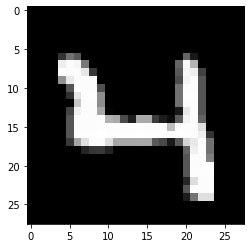

Prediction:  [5]
Label:  5


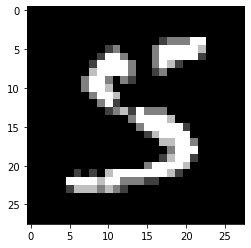

Prediction:  [8]
Label:  8


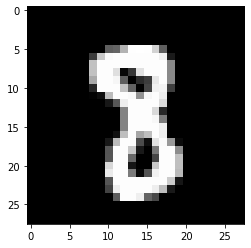

Prediction:  [2]
Label:  3


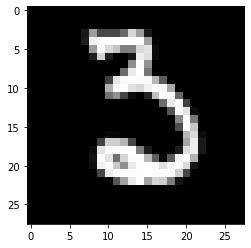

Prediction:  [4]
Label:  4


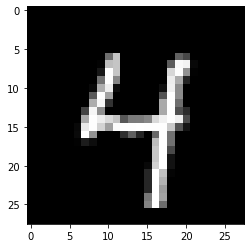

Prediction:  [7]
Label:  7


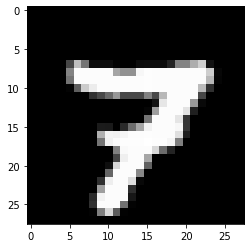

Prediction:  [0]
Label:  0


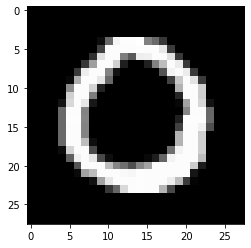

Prediction:  [5]
Label:  5


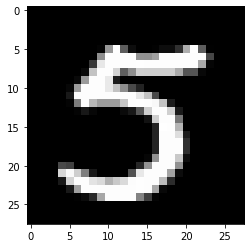

Prediction:  [2]
Label:  2


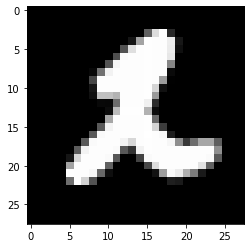

Prediction:  [8]
Label:  8


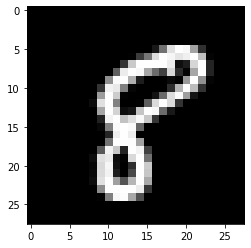

Prediction:  [0]
Label:  0


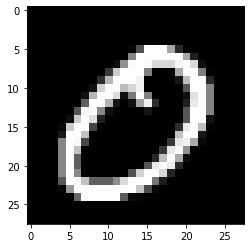

Prediction:  [5]
Label:  5


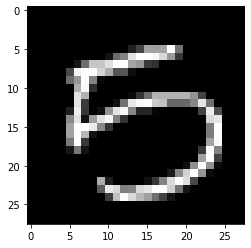

Prediction:  [2]
Label:  2


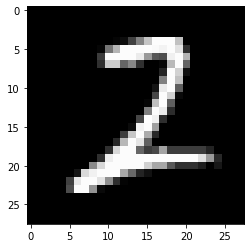

Prediction:  [0]
Label:  0


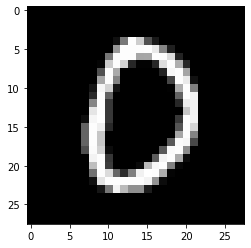

Prediction:  [3]
Label:  3


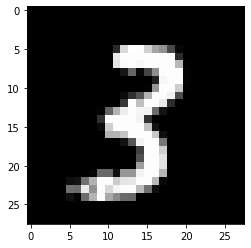

Prediction:  [1]
Label:  1


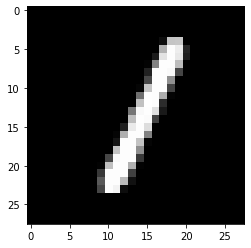

Prediction:  [2]
Label:  2


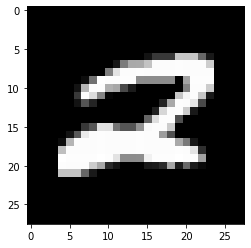

Prediction:  [2]
Label:  2


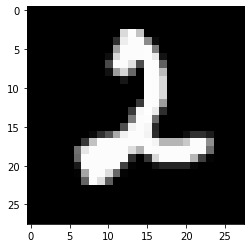

Prediction:  [9]
Label:  4


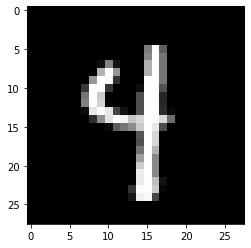

Prediction:  [9]
Label:  9


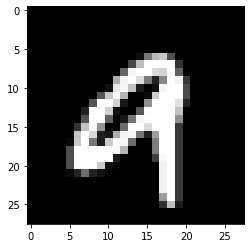

In [299]:
for i in range(20):
    test_prediction(net, i)